In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline

### PSI Calculator

##### This code is used to calculate Population Stability Index (based on 20 buckets) given a base file and a target file

In [2]:
def PSI_Calc(base_file, base_score, target_file, target_score):
    
    # Step1: Base
    base = [0]
    for i in range(1,20):
        base.append(np.percentile(base_file[base_score], 5*i))
    
    # Step2: PSI Calculator
    target = []
    bucket = []
    for i in range(0,20):
        if i < 19:
            target_i = (target_file[target_file[target_score] >= base[i]][target_score].count() - target_file[target_file[target_score] >= base[i+1]][target_score].count())/len(target_file)
        if i == 19:
            target_i = target_file[target_file[target_score] >= base[i]][target_score].count()/len(target_file)
        target.append((target_i - 0.05)*np.log(target_i/0.05))
        bucket.append(target_i)
        
    # Step3: Plot
    df_bucket = pd.DataFrame(bucket,columns=['bucket'])    
    ts = pd.Series(bucket, df_bucket.index)
    ts.plot()
    plt.pyplot.axhline(0.05, color = 'r')
    PSI = sum(target)    
    
    return plt.pyplot.title('PSI is ' + str(PSI))

##### Example

In [3]:
df_base = pd.DataFrame(abs(np.random.randn(10000)), columns = ['base_score'])
df_target = pd.DataFrame(abs(np.random.randn(20000)), columns = ['target_score'])

Text(0.5,1,'PSI is 0.005320609737725634')

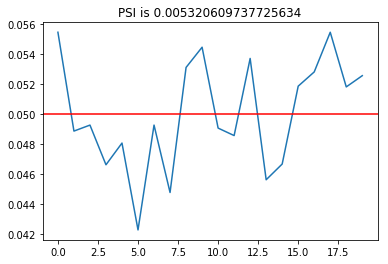

In [4]:
PSI_Calc(df_base, 'base_score', df_target, 'target_score')